In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [34]:
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df = pd.read_csv("iris.data", header=None, names=column_names)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [36]:
df.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [37]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object

In [38]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

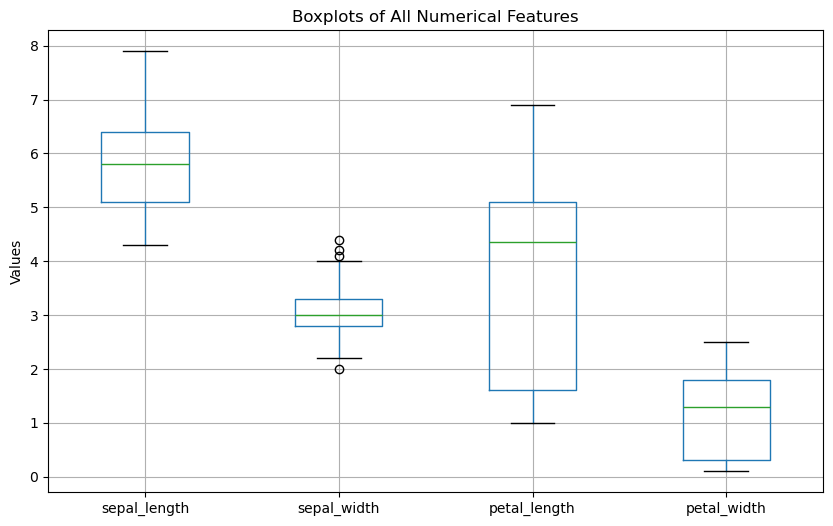

In [39]:
df.drop("class", axis=1).boxplot(figsize=(10, 6))
plt.title("Boxplots of All Numerical Features")
plt.ylabel("Values")
plt.grid(True)
plt.show()


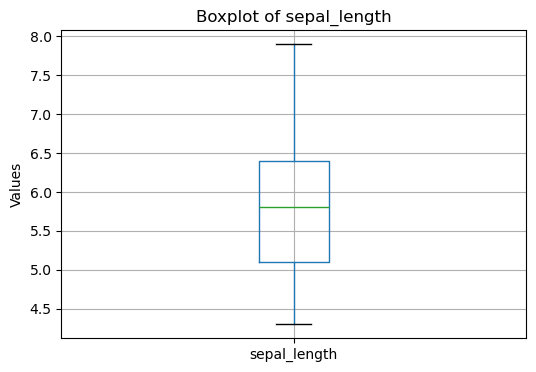

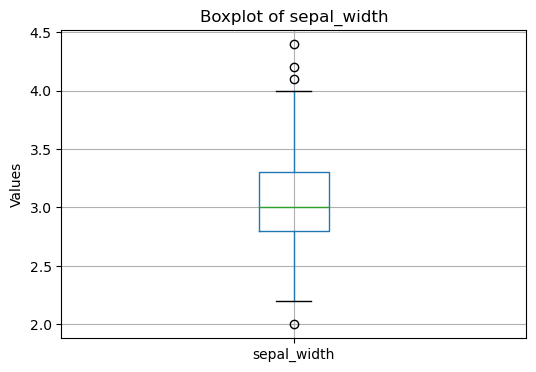

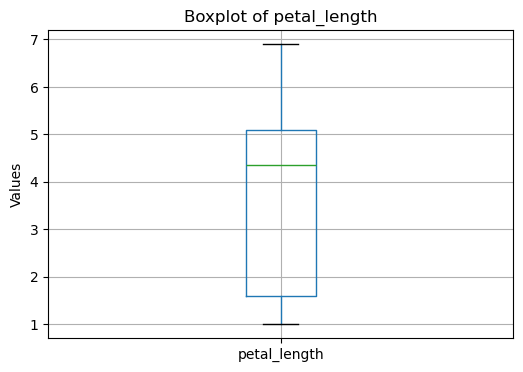

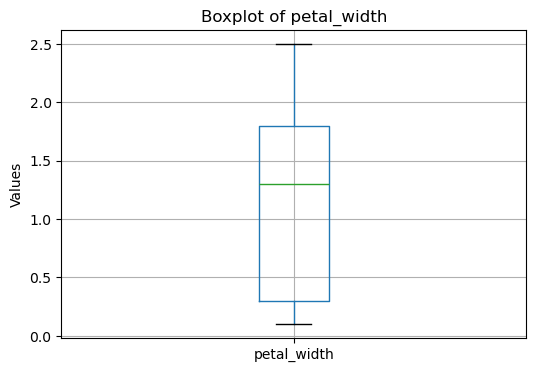

In [40]:
numeric_columns = df.select_dtypes(include='number').columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    df.boxplot(column=col)
    plt.title(f"Boxplot of {col}")
    plt.ylabel("Values")
    plt.grid(True)
    plt.show()

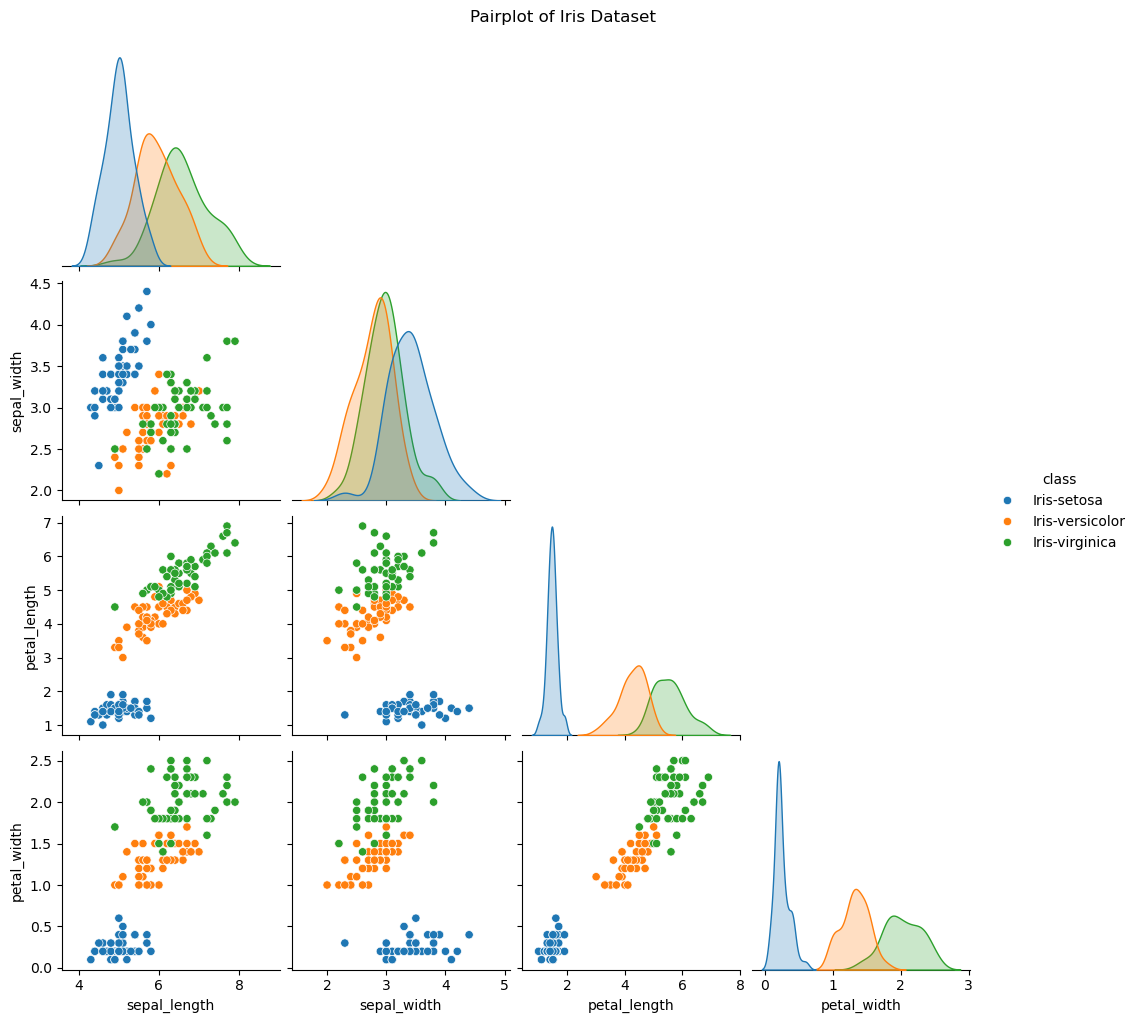

In [41]:
df = pd.read_csv("iris.data", header=None)
df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
sns.pairplot(df, hue="class", diag_kind="kde", corner=True)
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

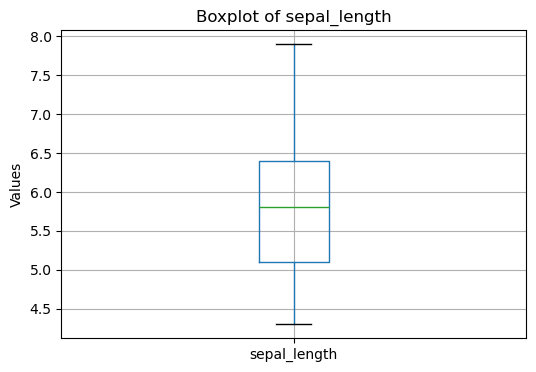

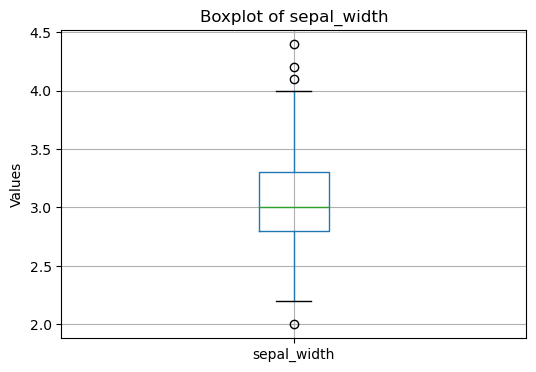

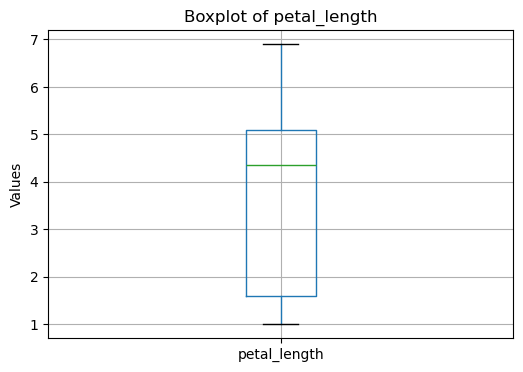

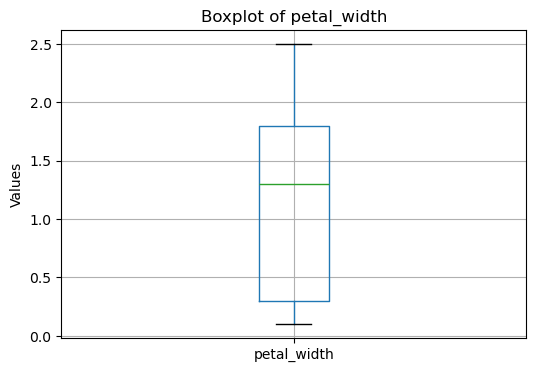

In [42]:
numeric_columns = df.select_dtypes(include='number').columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    df.boxplot(column=col)
    plt.title(f"Boxplot of {col}")
    plt.ylabel("Values")
    plt.grid(True)
    plt.show()

In [43]:
Q1 = df["sepal_width"].quantile(0.25)
Q3 = df["sepal_width"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = df[(df["sepal_width"] < lower_bound) | (df["sepal_width"] > upper_bound)]

print("Outliers in 'sepal_width':")
print(outliers[["sepal_width", "class"]])


Outliers in 'sepal_width':
    sepal_width            class
15          4.4      Iris-setosa
32          4.1      Iris-setosa
33          4.2      Iris-setosa
60          2.0  Iris-versicolor


In [44]:
Q1 = df["sepal_width"].quantile(0.25)
Q3 = df["sepal_width"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows that are within the bounds (i.e., NOT outliers)
df_no_outliers = df[(df["sepal_width"] >= lower_bound) & (df["sepal_width"] <= upper_bound)]

# Display results
print("Original shape:", df.shape)
print("After removing outliers in sepal_width:", df_no_outliers.shape)

Original shape: (150, 5)
After removing outliers in sepal_width: (146, 5)


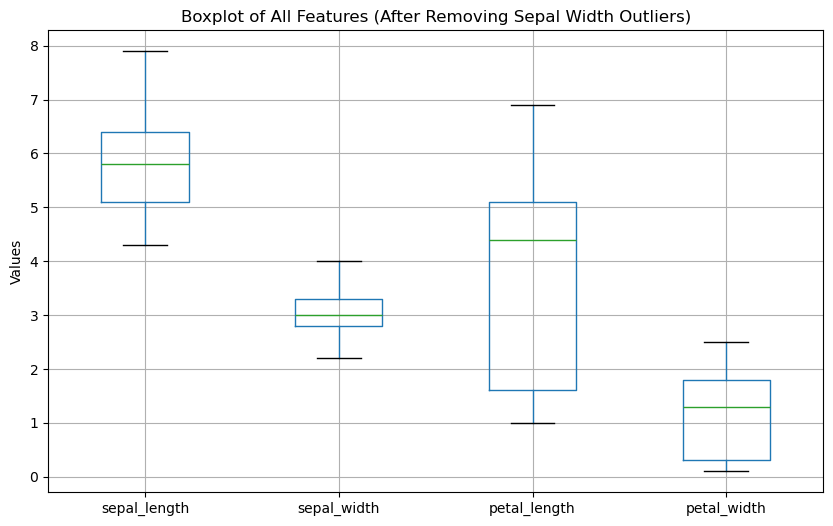

In [45]:
df_no_outliers_numeric = df_no_outliers.drop("class", axis=1)

# Create boxplots for all features
plt.figure(figsize=(10, 6))
df_no_outliers_numeric.boxplot()
plt.title("Boxplot of All Features (After Removing Sepal Width Outliers)")
plt.ylabel("Values")
plt.grid(True)
plt.show()


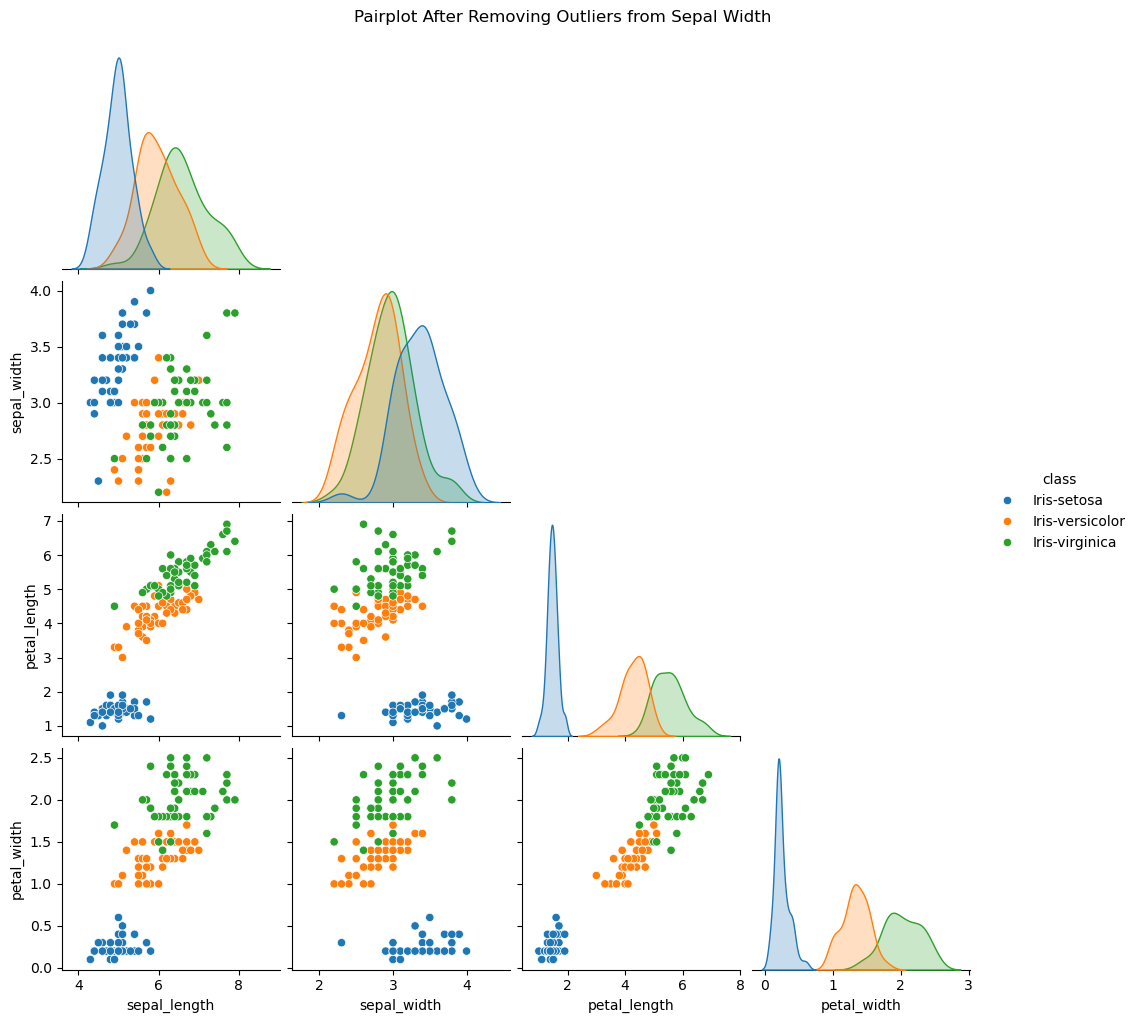

In [46]:
sns.pairplot(df_no_outliers, hue="class", diag_kind="kde", corner=True)
plt.suptitle("Pairplot After Removing Outliers from Sepal Width", y=1.02)
plt.show()

In [47]:
df_no_outliers.to_csv("iris_cleaned_sepal_width.csv", index=False)

print("Cleaned file saved as 'iris_cleaned_sepal_width.csv'")


Cleaned file saved as 'iris_cleaned_sepal_width.csv'


In [48]:

# Load iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame (optional, for easy viewing)
X_scaled_df = pd.DataFrame(X_scaled, columns=iris.feature_names)

print(X_scaled_df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


In [58]:
# Initialize and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can tune this
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



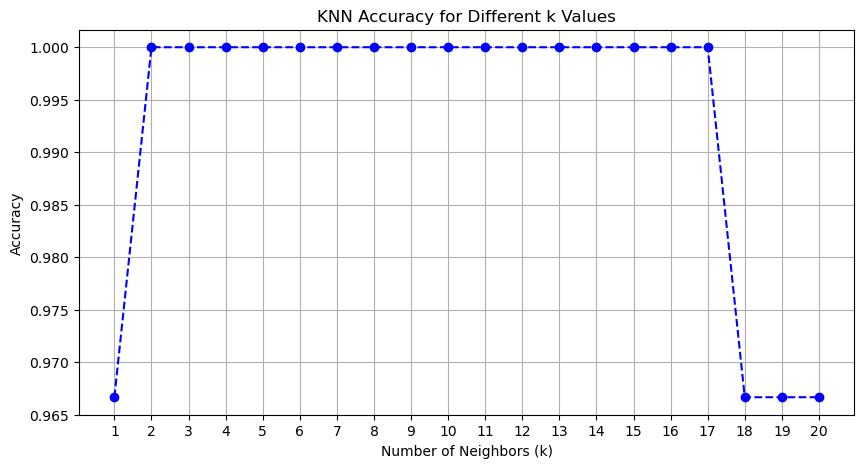

In [56]:

# Try different k values
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot accuracy vs. k
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='--', color='blue')
plt.title('KNN Accuracy for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [54]:
# Train KNN with chosen k
k = 1
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Evaluation
print(f"Evaluation for KNN (k={k}):\n")
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))


Evaluation for KNN (k=1):

✅ Accuracy: 0.9666666666666667

📊 Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]

📄 Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



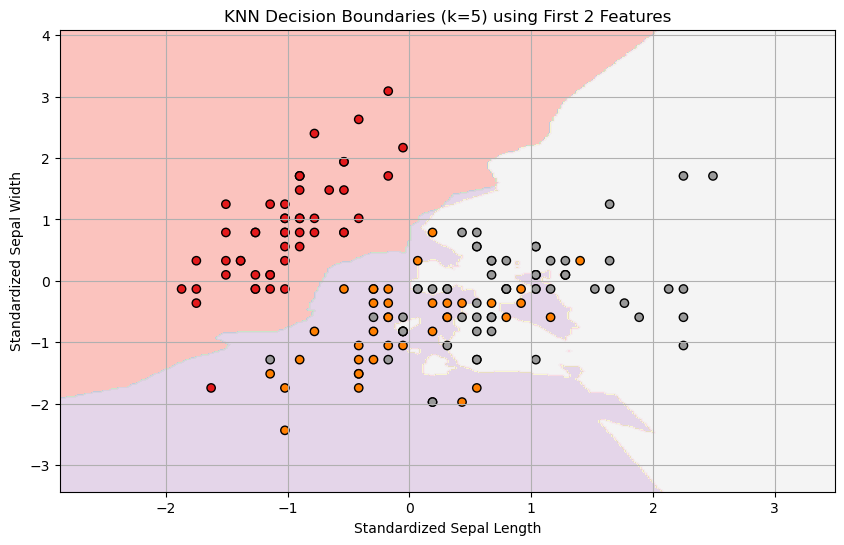

In [52]:

iris = load_iris()
X = iris.data[:, :2]  # First two features
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train KNN on 2 features
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_scaled, y)

# Create a mesh grid
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)
grid = np.c_[xx.ravel(), yy.ravel()]
Z = knn.predict(grid)
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1, alpha=0.8)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Standardized Sepal Length')
plt.ylabel('Standardized Sepal Width')
plt.title(f'KNN Decision Boundaries (k={k}) using First 2 Features')
plt.grid(True)
plt.show()


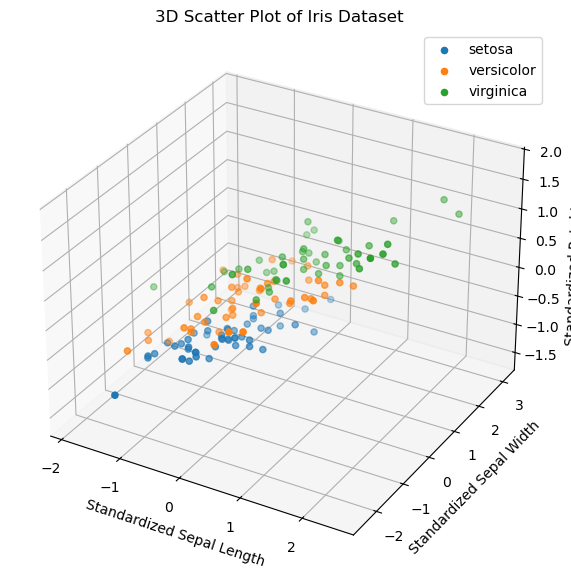

In [55]:
# Load dataset
iris = load_iris()
X = iris.data[:, :3]  # Use first 3 features
y = iris.target
labels = iris.target_names

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter points by class
for class_index in np.unique(y):
    ax.scatter(
        X_scaled[y == class_index, 0],
        X_scaled[y == class_index, 1],
        X_scaled[y == class_index, 2],
        label=labels[class_index]
    )

ax.set_xlabel('Standardized Sepal Length')
ax.set_ylabel('Standardized Sepal Width')
ax.set_zlabel('Standardized Petal Length')
ax.set_title('3D Scatter Plot of Iris Dataset')
ax.legend()
plt.show()
